In [16]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip

% matplotlib inline
%load_ext autoreload
% autoreload

In [17]:
data_info = pd.read_csv('/data/Good data_store.csv')
data_info.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35,36",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
cd /data

/data


In [4]:
test_idx = 1
test_name = 'test'+ data_info['File name'][test_idx ].astype(str)
test_name

'test2017021501'

In [5]:
test_data = sio.loadmat(test_name)

In [18]:
# Setting parameter
test_trace_idx = data_info.iloc[test_idx]['Trial number before']
bef_index = [int(s)-1 for s in str.split(test_trace_idx, ',')]
test_trace_idx = data_info.iloc[test_idx]['Trial number after']
aft_index = [int(s)-1 for s in str.split(test_trace_idx, ',')]
test_pip = data_info.iloc[test_idx]['Pip number']
isi = data_info.iloc[test_idx]['IS100'].astype(int)
ifartifact = data_info.iloc[test_idx]['Artifact'].astype(int)

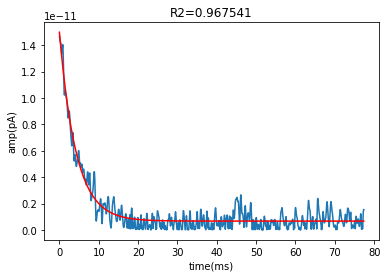

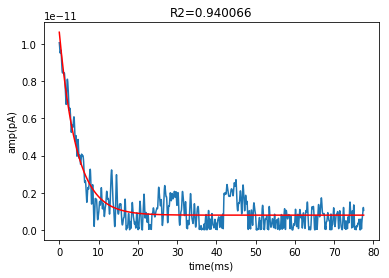

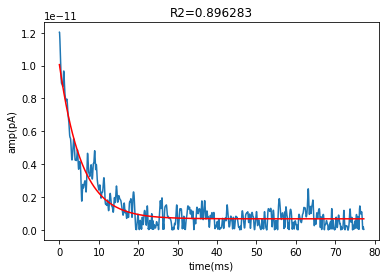

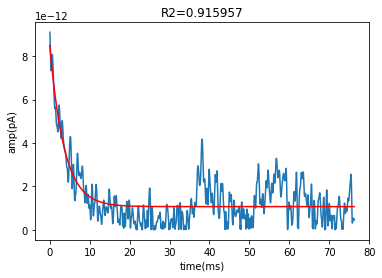

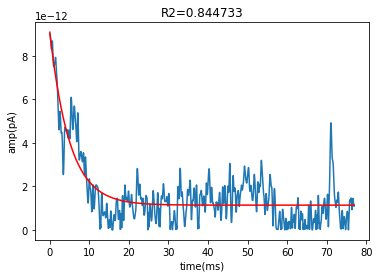

In [19]:
bef_output, aft_output = patch_pip.bef_aft_ana(trial=test_data['test'][0], bef_index=bef_index, aft_index=aft_index, test_pip=test_pip, isi=isi, ifartifact=ifartifact, ave_len=3,  iffigure=1)

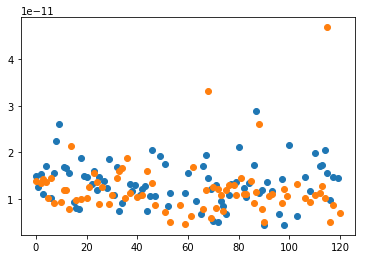

In [20]:
# Visualize raw data points
raw1_joint = np.concatenate([bef_output['raw_amp1'], aft_output['raw_amp1']])
raw2_joint = np.concatenate([bef_output['raw_amp2'], aft_output['raw_amp2']])
plt.plot(raw1_joint, 'o')
plt.plot(raw2_joint, 'o')

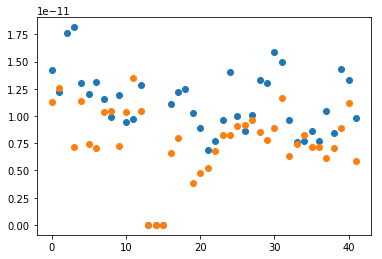

In [21]:
# Visualize average plots
resp1_joint = np.concatenate([bef_output['ave_amp1'], np.zeros(3).reshape(-1,1), aft_output['ave_amp1']])
resp2_joint = np.concatenate([bef_output['ave_amp2'], np.zeros(3).reshape(-1,1), aft_output['ave_amp2']])
plt.plot(resp1_joint, 'o')
plt.plot(resp2_joint, 'o')

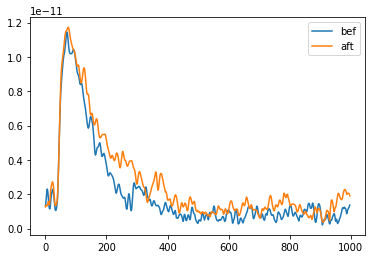

In [22]:
# Visualize average trace
plt.plot(np.mean(bef_output['ave_all'][-5:], axis=0)[bef_output['resp1_region']], label='bef')
plt.plot(np.mean(aft_output['ave_all'][-5:], axis=0)[aft_output['resp1_region']], label='aft')
plt.legend()

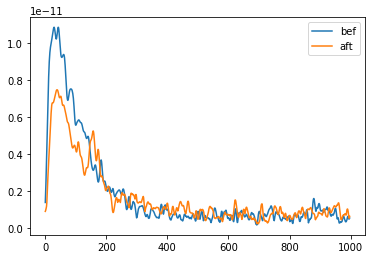

In [23]:
# Visualize average trace
plt.plot(np.mean(bef_output['ave_all'][-5:], axis=0)[bef_output['resp2_region']], label='bef')
plt.plot(np.mean(aft_output['ave_all'][-5:], axis=0)[aft_output['resp2_region']], label='aft')
plt.legend()

In [ ]:
# Conduct batch analysis with the same protocol
